In [181]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import fix_yahoo_finance as fyf



In [182]:
for_tick=pd.read_csv(r"C:\Users\Krishnakanth\Downloads\ind_niftynext50list (1).csv")
dic=pd.DataFrame
dic=for_tick["ticker"].to_dict()


In [183]:
sock=[dic]
sock

[{0: 'ADANIPORTS.NS',
  1: 'ASIANPAINT.NS',
  2: 'AXISBANK.NS',
  3: 'BAJAJ-AUTO.NS',
  4: 'BAJFINANCE.NS',
  5: 'BAJAJFINSV.NS',
  6: 'BPCL.NS',
  7: 'BHARTIARTL.NS',
  8: 'INFRATEL.NS',
  9: 'BRITANNIA.NS',
  10: 'CIPLA.NS',
  11: 'COALINDIA.NS',
  12: 'DRREDDY.NS',
  13: 'EICHERMOT.NS',
  14: 'GAIL.NS',
  15: 'GRASIM.NS',
  16: 'HCLTECH.NS',
  17: 'HDFCBANK.NS',
  18: 'HEROMOTOCO.NS',
  19: 'HINDALCO.NS',
  20: 'HINDUNILVR.NS',
  21: 'HDFC.NS',
  22: 'ICICIBANK.NS',
  23: 'ITC.NS',
  24: 'IBULHSGFIN.NS',
  25: 'IOC.NS',
  26: 'INDUSINDBK.NS',
  27: 'INFY.NS',
  28: 'JSWSTEEL.NS',
  29: 'KOTAKBANK.NS',
  30: 'LT.NS',
  31: 'M&M.NS',
  32: 'MARUTI.NS',
  33: 'NTPC.NS',
  34: 'ONGC.NS',
  35: 'POWERGRID.NS',
  36: 'RELIANCE.NS',
  37: 'SBIN.NS',
  38: 'SUNPHARMA.NS',
  39: 'TCS.NS',
  40: 'TATAMOTORS.NS',
  41: 'TATASTEEL.NS',
  42: 'TECHM.NS',
  43: 'TITAN.NS',
  44: 'UPL.NS',
  45: 'ULTRACEMCO.NS',
  46: 'VEDL.NS',
  47: 'WIPRO.NS',
  48: 'YESBANK.NS',
  49: 'ZEEL.NS',
  50: 'ABB.NS'

In [184]:
def stock(symbol):
    stock = fyf.download(symbol,
                        start='2015-01-01',end='2019-01-01')
    
    
    f= stock["Close"]
    return f
def addstock(df,ticker):
    df[ticker]=stock(ticker)
    
    return df


In [185]:
doby=pd.DataFrame()

In [186]:
for k in range(99):
    try:
        addstock(doby,dic[k])
    except : pass
    continue
  

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

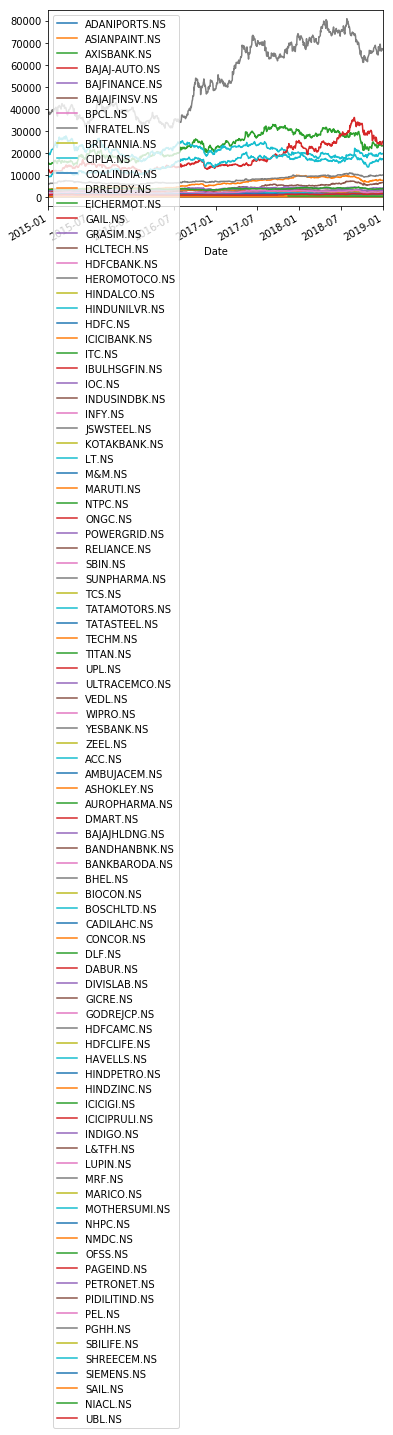

In [187]:
doby.plot()

In [188]:
import statsmodels
from statsmodels.tsa.stattools import coint

In [189]:
coint(doby[dic[1]],doby[dic[2]])

(-1.747374892342281,
 0.6549139186836186,
 array([-3.90758189, -3.34233387, -3.04875422]))

In [190]:
dic[1],dic[2]

('ASIANPAINT.NS', 'AXISBANK.NS')

In [191]:
doby=doby.dropna(axis='rows')

0.012106834713515095


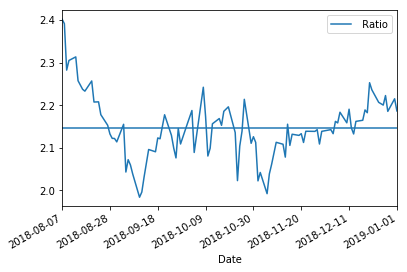

In [192]:
S1 = doby[dic[1]]
S2 = doby[dic[2]]
score, pvalue, _ = coint(S1, S2)
print(pvalue)
ratios = S1 / S2
ratios.plot()
plt.axhline(ratios.mean())
plt.legend([' Ratio'])
plt.show()

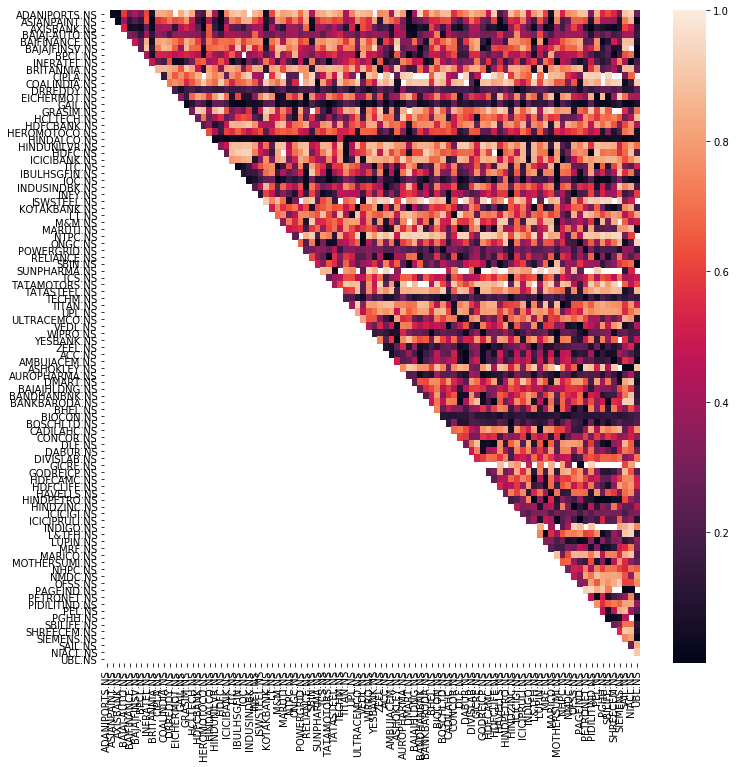

[('ADANIPORTS.NS', 'HDFC.NS'), ('ADANIPORTS.NS', 'DMART.NS'), ('ASIANPAINT.NS', 'AXISBANK.NS'), ('ASIANPAINT.NS', 'BRITANNIA.NS'), ('ASIANPAINT.NS', 'HDFC.NS'), ('ASIANPAINT.NS', 'MARICO.NS'), ('ASIANPAINT.NS', 'UBL.NS'), ('AXISBANK.NS', 'HEROMOTOCO.NS'), ('AXISBANK.NS', 'SBIN.NS'), ('AXISBANK.NS', 'ULTRACEMCO.NS'), ('AXISBANK.NS', 'DMART.NS'), ('AXISBANK.NS', 'BAJAJHLDNG.NS'), ('AXISBANK.NS', 'HAVELLS.NS'), ('AXISBANK.NS', 'MRF.NS'), ('AXISBANK.NS', 'PIDILITIND.NS'), ('AXISBANK.NS', 'SHREECEM.NS'), ('BAJFINANCE.NS', 'KOTAKBANK.NS'), ('BAJFINANCE.NS', 'HDFCAMC.NS'), ('BAJFINANCE.NS', 'L&TFH.NS'), ('BAJFINANCE.NS', 'MRF.NS'), ('BAJAJFINSV.NS', 'BANDHANBNK.NS'), ('BPCL.NS', 'DMART.NS'), ('BPCL.NS', 'SHREECEM.NS'), ('BPCL.NS', 'UBL.NS'), ('INFRATEL.NS', 'ITC.NS'), ('INFRATEL.NS', 'IOC.NS'), ('INFRATEL.NS', 'TATAMOTORS.NS'), ('INFRATEL.NS', 'YESBANK.NS'), ('INFRATEL.NS', 'MOTHERSUMI.NS'), ('INFRATEL.NS', 'NIACL.NS'), ('COALINDIA.NS', 'GICRE.NS'), ('DRREDDY.NS', 'ICICIGI.NS'), ('EICHERMOT.N

In [193]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.02:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

scores, pvalues, pairs = find_cointegrated_pairs(doby)
import seaborn
m = [0,0.2,0.4,0.6,0.8,1]
plt.figure(figsize = (12,12))
seaborn.heatmap(pvalues, xticklabels=doby.columns.values, 
                yticklabels=doby.columns.values, 
               annot_kws={"size":16},mask = (pvalues > 0.95))
plt.show()
print(pairs)

0.7946865999306213


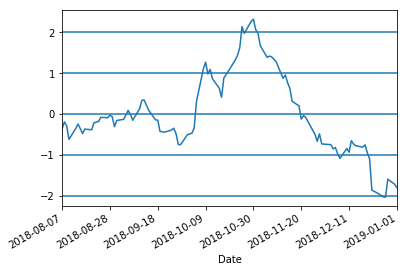

NameError: name 'zcore' is not defined

In [194]:
def zscore(series):
    return (series - series.mean()) / np.std(series)
S1 = doby['IOC.NS']
S2 = doby['BPCL.NS']
score, pvalue, _ = coint(S1, S2)
print(pvalue)
ratios = S1 / S2


zscore(ratios).plot()
plt.axhline(zscore(ratios).mean())
plt.axhline(1.0)
plt.axhline(-1.0)
plt.axhline(2.0)
plt.axhline(-2.0)
plt.show()
print(zcore(ratios).mean())

In [ ]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

In [ ]:
zscore(ratios).plot()
plt.axhline(zscore(ratios).mean())
plt.axhline(1.0)
plt.axhline(-1.0)
plt.axhline(2.0)
plt.axhline(-2.0)
plt.show()

In [ ]:
corr = doby.corr()
plt.figure(figsize = (64,64))
import seaborn as sns
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            
            
            yticklabels=corr.columns.values,annot=True,annot_kws={"size":16})

In [ ]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(doby, 45))

In [ ]:
def zscore(series):
    return (series - series.mean()) / np.std(series)
S1 = doby['ADANIPORTS.NS']
S2 = doby['HDFC.NS']
score, pvalue, _ = coint(S1, S2)
print(pvalue)
ratios = S1 / S2


zscore(ratios).plot()
plt.axhline(zscore(ratios).mean())
plt.axhline(1.0)
plt.axhline(-1.0)
plt.axhline(2.0)
plt.axhline(-2.0)
plt.show()
print(zcore(ratios).mean())

In [ ]:
def coco(df, n=5):
    au_corr = coint(df,df).abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
S1 = doby['M&M.NS']
S2 = doby['TATAMOTORS.NS']
score, pvalue, _ = coint(S1, S2)
print(pvalue)
ratios = S1 / S2

In [ ]:
S1 = doby['ADANIPORTS.NS']
S2 = doby['HDFC.NS']
score, pvalue, _ = coint(S1, S2)
print(pvalue)
ratios = S1 / S2
X = ratios
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

In [ ]:
def cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = adfuller(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.02:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [ ]:
cointegrated_pairs(doby)

In [ ]:
M&M.NS         TATAMOTORS.NS    0.956861
BAJFINANCE.NS  L&TFH.NS         0.955483
MARUTI.NS      BANDHANBNK.NS    0.955403
BAJAJFINSV.NS  BANDHANBNK.NS    0.954809
GRASIM.NS      TATAMOTORS.NS    0.953746
BANKBARODA.NS  SBILIFE.NS       0.953644
IBULHSGFIN.NS  YESBANK.NS       0.953025
BANKBARODA.NS  HDFCLIFE.NS      0.952357
INDUSINDBK.NS  BANDHANBNK.NS    0.951661
MARUTI.NS      HDFCLIFE.NS      0.951276
BAJAJFINSV.NS  L&TFH.NS         0.948237
BAJFINANCE.NS  HDFCAMC.NS       0.947477
M&M.NS         PEL.NS           0.947178
HDFCAMC.NS     L&TFH.NS         0.947006
INDUSINDBK.NS  MARUTI.NS        0.945478

In [ ]:
doby.to_excel('nse100.xlsx')